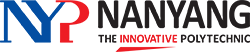

# Practical 5b: POS and NER


## Objectives

- Perform Part-of-Speech (POS) tagging
- Identify entities with raw text using Name Entity Recognition (NER)

## Part-of-Speech (POS)
Part-of-Speech tagging simply refers to assigning parts of speech to individual words in a sentence, which means that, unlike phrase matching, which is performed at the sentence or multi-word level, parts of speech tagging is performed at the token level.
 
In corpus linguistics, **part-of-speech tagging** (POS tagging), also called **grammatical tagging** or **word-category disambiguation**. The POS tagger in the NLTK library outputs specific tags for certain words. 

Here’s some of the common tags, what they mean:

Tag|Description
-|:-
CC| coordinating conjunction
DT| determiner
IN| preposition/subordinating conjunction
JJ| adjective ‘big’
NN| noun, singular ‘desk’
PRP| personal pronoun I, he, she
RB| adverb very, silently
UH| interjection
VB| verb, base form take

Text may contain stop words like ‘the’, ‘is’, ‘are’. We will filter the stop words from the text before doing the part-of-speech tagging. 

We will go through a sample program to illustrate how to do POS using a Python program.


## Import libraries and download the packages

*NOTE: You have to use nltk.download() after installing it to get additional dependencies.*

In [1]:
# Enter code here
import pandas as pd

import nltk
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wongw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Read in File for analysis
Next, we will read the file for analysis. For this practical we will be using Singapore News, **SGNews.csv**. This file must be placed in the same directory as your Jupyter notebook. 

Use Panda DataFrame to read in the data as follows:

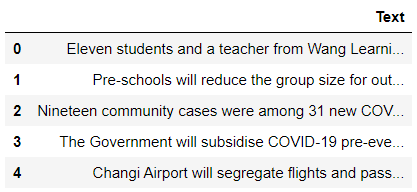

In [3]:
# Read in SGNews.csv and display the first 5 lines of the data
df=pd.read_csv('SGNews.csv')
df

,Title,Text
0,Several Wang Learning Centre students to quara...,Eleven students and a teacher from Wang Learni...
1,Pre-school outdoor activities reduced to 2 chi...,Pre-schools will reduce the group size for out...
2,19 community cases among 31 new COVID-19 infec...,Nineteen community cases were among 31 new COV...
3,Pre-event testing to be subsidised for live pe...,The Government will subsidise COVID-19 pre-eve...
4,COVID-19: Changi Airport to segregate flight a...,Changi Airport will segregate flights and pass...
...,...,...
95,"Healthcare workers being asked to move out, sh...",Cases of Tan Tock Seng Hospital (TTSH) employe...
96,New artefacts from prisoners of war on display...,"In a letter dated Apr 20, 1945, a woman named ..."
97,"Former BP director jailed, ordered to pay more...",A former director of BP Singapore was jailed f...
98,‘Several important lessons’ from Tan Tock Seng...,Singapore has learnt several important lessons...


## Using the POS-tagger in the NLTK library to tag the words
The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

Before doing POS, we need to tokenize the data first.

In [4]:
# Enter codes here
def tagPOS(text):
    # Word tokenizers is used to find the words 
    wordsList = nltk.word_tokenize(text) 

    #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.  
    tagged = nltk.pos_tag(wordsList) 
    
    return tagged

df['POS_News'] = df['Text'].apply(lambda x: tagPOS(x))  
df.head()

,Title,Text,POS_News
0,Several Wang Learning Centre students to quara...,Eleven students and a teacher from Wang Learni...,"[(Eleven, JJ), (students, NNS), (and, CC), (a,..."
1,Pre-school outdoor activities reduced to 2 chi...,Pre-schools will reduce the group size for out...,"[(Pre-schools, NNP), (will, MD), (reduce, VB),..."
2,19 community cases among 31 new COVID-19 infec...,Nineteen community cases were among 31 new COV...,"[(Nineteen, NNP), (community, NN), (cases, NNS..."
3,Pre-event testing to be subsidised for live pe...,The Government will subsidise COVID-19 pre-eve...,"[(The, DT), (Government, NNP), (will, MD), (su..."
4,COVID-19: Changi Airport to segregate flight a...,Changi Airport will segregate flights and pass...,"[(Changi, NNP), (Airport, NNP), (will, MD), (s..."


## To find specify tag from the tagged text
We all know that sentences are made up of words belonging to different Parts of Speech (POS). There are eight different POS in the English language: **noun**, **pronoun**, **verb**, **adjective**, **adverb**, **preposition**, **conjunction**, and **intersection**.

The POS determines how a specific word functions in meaning in a given sentence. For example, take the word “right”. In the sentence, “The boy was awarded chocolate for giving the right answer”, “right” is used as an adjective. Whereas, in the sentence, “You have the right to say whatever you want”, “right” is treated as a noun.

This goes to show that the POS tag of a word carries a lot of significance when it comes to understanding the meaning of a sentence. And we can leverage it to extract meaningful information from our text. Research has shown the presence of adjectives and adverbs is usually a good indicator of text subjectivity. In other words, statements that use adjectives like “interesting,” “problematic” and “awesome” might be more likely to convey a subjective point of view than statements that do not include those adjectives. 

Next, we will define a `fingtags` function to find specify tag from the tagged text. The `fingtags` function will return the top N words based on the POS tag. You can define N to return more words if needed.


Let's find the top 5 adjective (JJ) from the tenth review.


In [5]:
# Enter codes here
# find the top N words based on the POS tag
def findtags(tag_prefix, tagged_text, n):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(n)) for tag in cfd.conditions())

# find the top 5 adjective in the first news
tagged_text = df['POS_News'][0]
tagdict = findtags('JJ', tagged_text, 5)
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

JJ [('positive', 2), ('same', 2), ('professional', 2), ('other', 2), ('Eleven', 1)]
JJS [('latest', 1)]


## Named Entity Recognition (NER)
NER is a standard NLP problem which involves spotting named entities (people, places, organizations etc.) from a chunk of text, and classifying them into a predefined set of categories. Some of the practical applications of NER include:
- Scanning news articles for the people, organizations and locations reported.
- Providing concise features for search optimization: instead of searching the entire content, one may simply search for the major entities involved.
- Quickly retrieving geographical locations talked about in Twitter posts.

NER is a keyword extraction technique that uses natural language processing (NLP) to automatically identify named entities within raw text and classify them into predetermined categories, like people, organizations, email addresses, locations, values, etc.

Before POS need to be done before NER can be performed. Once we have completed the parts-of-speech tagging, we will perform chunking. In simple terms, what chunking does is that it adds more structure to the sentence over and above the tagging. The output results in grouping of words called 'chunks'. In our example, we will only look at Nouns for the NER tagging.

In [6]:
# Enter codes here
from nltk import ne_chunk
nltk.download('words')
nltk.download('maxent_ne_chunker')

res_chunk = ne_chunk(tagged_text)

for x in str(res_chunk).split('\n'):
    if '/NN' in x:
        print(x)

  students/NNS
  teacher/NN
  (PERSON Wang/NNP Learning/NNP Centre/NNP)
  contact/NN
  student/NN
  COVID-19/NNP
  student/NN
  class/NN
  (FACILITY Wang/NNP Learning/NNP Centre/NNP)
  ’/NNP
  branch/NN
  (GPE East/NNP Coast/NNP)
  May/NNP
  student/NN
  class/NN
  (ORGANIZATION Learning/NNP Point/NNP)
  May/NNP
  tuition/NN
  centre/NN
  (ORGANIZATION CNA/NNP)
  Saturday/NNP
  May/NNP
  (ORGANIZATION Wang/NNP)
  Learning/NNP
  Centre/NNP
  website/NN
  (GPE East/NNP)
  Coast/NNP
  branch/NN
  (ORGANIZATION EastGate/NNP)
  centre/NN
  units/NNS
  floors/NNS
  building/NN
  (PERSON Wang/NNP Learning/NNP Centre/NNP)
  “/NNP
  disinfection/NN
  ”/NNS
  May/NNP
  (ORGANIZATION Ministry/NNP)
  (GPE Health/NNP)
  (ORGANIZATION MOH/NNP)
  people/NNS
  classroom/NN
  COVID-19/NNP
  student/NN
  AdvertisementAdvertisement/NNP
  No/NNP
  branches/NNS
  (PERSON Wang/NNP Learning/NNP Centre/NNP)
  outlets/NNS
  (GPE Singapore/NNP)
  (PERSON Wang/NNP Learning/NNP Centre/NNP)
  classes/NNS
  May/NNP

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\wongw\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\wongw\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


With the function nltk.ne_chunk(), we can recognize named entities using a classifier, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

## NER with spaCy
**spaCy** is an open-source Python library that parses and “understands” large volumes of text.It features NER, POS tagging, dependency parsing, word vectors and more.

<b>Run the following command in Anaconda prompt:</b>
```Python
pip install spacy
python -m spacy download en_core_web_sm
```

We will be using spaCy to perform POS and NER using the same Singapore News dataset. Important the necessary libraries:
```Python
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
```

In [26]:
!pip install spacy


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 804.6 kB/s eta 0:00:16
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 3.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/12.8 MB 4.3 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 5.5 MB/s eta 0:00:02
     ------ --------------------------------- 2.0/12.8 MB 4.9 MB/s eta 0:00:03
     -------- ------------------------------- 2.7/12.8 MB 6.0 MB/s eta 0:00:02
     --------- ------------------------------ 3.2/12.8 MB 6.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 6.5 MB


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Enter code here
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

ModuleNotFoundError: No module named 'en_core_web_sm'

In [3]:
import spacy

try:
    spacy.util.get_model_meta('en_core_web_sm')
    print("en_core_web_sm model is installed!")
except:
    print("en_core_web_sm model is not installed. Please install it using `python -m spacy download en_core_web_sm`.")

en_core_web_sm model is not installed. Please install it using `python -m spacy download en_core_web_sm`.


One of the nice things about Spacy is that we only need to apply nlp once, the entire background pipeline will return the objects.

spaCy recognizes the following entities:
* PERSON:      People, including fictional
* NORP:        Nationalities or religious or political groups
* FAC:         Buildings, airports, highways, bridges, etc
* ORG:         Companies, agencies, institutions, etc
* GPE:         Countries, cities, states
* LOC:         Non-GPE locations, mountain ranges, bodies of water
* PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
* EVENT:       Named hurricanes, battles, wars, sports events, etc
* WORK_OF_ART: Titles of books, songs, etc
* LAW:         Named documents made into laws
* LANGUAGE:    Any named language
* DATE:        Absolute or relative dates or periods
* TIME:        Times smaller than a day
* PERCENT:     Percentage, including "%"
* MONEY:       Monetary values, including unit
* QUANTITY:    Measurements, as of weight or distance
* ORDINAL:     “first”, “second”, etc
* CARDINAL:    Numerals that do not fall under another type

Let's get the entities from the first news.
```Python
# Extract entities from the first new
from pprint import pprint

doc = nlp(df['Text'][0])
pprint([(X.text, X.label_) for X in doc.ents])

```

In [ ]:
# Enter code here


Counting the number of entities
```Python
labels = [x.label_ for x in doc.ents]
Counter(labels)
```

In [ ]:
# Enter code here


Get the three most frequent tokens
```Python
items = [x.text for x in doc.ents]
Counter(items).most_common(3)
```

In [ ]:
# Enter code here


## Visualising POS and NER
spaCy offers an outstanding visualizer called displaCy which helps us to explore the behaviour of the entity recognition model interactively.

Using spaCy’s built-in displaCy visualizer, here’s what the first news and its dependencies look like:
```Python
displacy.render(doc, style='dep', jupyter = True, options = {'distance': 70})
```

In [ ]:
# Enter codes here


Finally, we visualize the entity of the first news.
```Python
displacy.render(doc, style='ent', jupyter = True)
```

In [ ]:
# Enter codes here


You can pass a list of entity types to restrict the visualization:
```Python
options={'ents':['ORG','DATE']}
displacy.render(doc, style='ent', jupyter = True, options=options)
```

In [ ]:
# Enter codes here


### Additional Learning Reference
1. Hands-on NLP Project: A Comprehensive Guide to Information Extraction using Python<br/>
https://www.analyticsvidhya.com/blog/2020/06/nlp-project-information-extraction/

2. NER using spaCY<br/>
https://towardsdatascience.com/named-entity-recognition-ner-using-spacy-nlp-part-4-28da2ece57c6

# Exercise
You will be using **CovidNews.txt** dataset for this exercise. Perform the following tasks:

1. Read all text from **CovidNews.txt** into a string
2. Perform POS on the Covid News
3. Find the top 5 adjectives in the Covid news
4. Count the number of entities and visualize the entities

In [ ]:
# Enter your codes here
# Read all text from CovidNews.txt into a string


# Perform POS on the Covid News



# Find the top 5 adjectives in the Covid news



# Count the number of entities and visualize the entities


